In [1]:
# K-means
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sn
from sklearn.cluster import KMeans

In [32]:
data = pd.read_excel("material.xlsx")

In [33]:
data.head()

,MixID,type,vf,SF,DPE,PPE,Fresh_density,Cstrength,density,WA,USPV,WP,Fstrength
0,M0,0,0.0,0.0,0.00,0.0,2420.73,64.5,2514.0,1.68,5.03,4.7,5.2
1,M1,0,0.2,15.7,0.00,0.0,2436.43,64.1,2519.3,1.55,5.10,3.3,6.7
2,M2,0,0.6,47.1,0.00,0.0,2467.83,63.8,2528.4,1.49,4.92,4.3,8.7
3,M3,0,1.0,78.5,0.00,0.0,2499.23,63.2,2588.4,1.75,4.82,5.8,12.9
4,M4,0,0.2,0.0,1.84,0.0,2422.57,58.1,2534.5,1.67,5.06,5.3,8.3


### Here, type = 0 is 28 days normal water curing data, type = 1 is heat cool cycle data and type =2 is wet dry cycle data.


In [34]:
data.shape

(30, 13)

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MixID          30 non-null     object 
 1   type           30 non-null     int64  
 2   vf             30 non-null     float64
 3   SF             30 non-null     float64
 4   DPE            30 non-null     float64
 5   PPE            30 non-null     float64
 6   Fresh_density  30 non-null     float64
 7   Cstrength      30 non-null     float64
 8   density        30 non-null     float64
 9   WA             30 non-null     float64
 10  USPV           30 non-null     float64
 11  WP             30 non-null     float64
 12  Fstrength      30 non-null     float64
dtypes: float64(11), int64(1), object(1)
memory usage: 3.2+ KB


In [36]:
data.describe()

,type,vf,SF,DPE,PPE,Fresh_density,Cstrength,density,WA,USPV,WP,Fstrength
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,1.000000,0.540000,14.130000,1.656000,1.638000,2438.071000,67.243333,2490.516667,1.537333,4.733000,1.946667,8.940000
std,0.830455,0.364455,26.190116,3.069415,3.036052,24.579344,5.526156,49.179987,0.283706,0.203557,3.121973,1.474285
min,0.000000,0.000000,0.000000,0.000000,0.000000,2420.730000,55.000000,2387.200000,0.900000,4.210000,0.000000,5.200000
25%,0.000000,0.200000,0.000000,0.000000,0.000000,2422.570000,63.875000,2457.000000,1.377500,4.645000,0.000000,8.325000
50%,1.000000,0.600000,0.000000,0.000000,0.000000,2427.625000,68.250000,2495.950000,1.580000,4.715000,0.000000,8.950000
75%,2.000000,1.000000,15.700000,1.840000,1.820000,2436.430000,71.175000,2519.300000,1.717500,4.850000,4.275000,9.275000
max,2.000000,1.000000,78.500000,9.200000,9.100000,2499.230000,75.600000,2588.400000,2.140000,5.100000,11.300000,12.900000


In [37]:
# Normalization function 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data_df = scaler.fit_transform(data.iloc[:,2:])

In [38]:
scaled_data_df

array([[-1.50699304, -0.54873968, -0.54873968, -0.54873968, -0.71757199,
        -0.50491358,  0.4856607 ,  0.51146433,  1.48399246,  0.89699772,
        -2.58018999],
       [-0.94884747,  0.06097108, -0.54873968, -0.54873968, -0.06790471,
        -0.57853403,  0.59527043,  0.04541038,  1.833755  ,  0.44089719,
        -1.54535443],
       [ 0.16744367,  1.2803926 , -0.54873968, -0.54873968,  1.23142985,
        -0.63374937,  0.78346826, -0.16969144,  0.93436563,  0.76668328,
        -0.16557369],
       [ 1.28373482,  2.49981412, -0.54873968, -0.54873968,  2.53076441,
        -0.74418004,  2.02433308,  0.76241645,  0.43470486,  1.25536243,
         2.73196587],
       [-0.94884747, -0.54873968,  0.06097108, -0.54873968, -0.64143264,
        -1.68284077,  0.90962285,  0.47561403,  1.63389069,  1.09246938,
        -0.44152984],
       [ 0.16744367, -0.54873968,  1.2803926 , -0.54873968, -0.48915394,
        -2.25339925,  0.47532016,  0.61901524,  1.18419601,  2.36303516,
         0.179

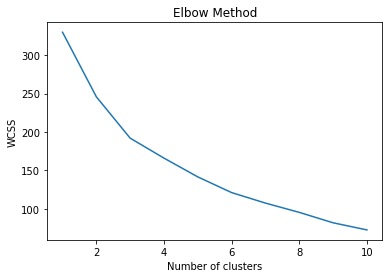

In [39]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(scaled_data_df)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [110]:
#Build Cluster algorithm
from sklearn.cluster import KMeans
clusters_new = KMeans(4, random_state=42)
clusters_new.fit(scaled_data_df)

KMeans(n_clusters=4, random_state=42)

#### From above Elbow method plot, we choosed number clusters  = 3.

In [111]:
clusters_new.labels_

array([2, 2, 2, 3, 2, 2, 0, 0, 1, 1, 0, 0, 0, 3, 0, 0, 0, 0, 1, 1, 2, 2,
       0, 3, 0, 0, 0, 0, 1, 1], dtype=int32)

In [112]:
max(clusters_new.labels_)

3

In [113]:
#Assign clusters to the data set
data['cluster_name'] = clusters_new.labels_

In [114]:
data

,MixID,type,vf,SF,DPE,PPE,Fresh_density,Cstrength,density,WA,USPV,WP,Fstrength,cluster_name
0,M0,0,0.0,0.0,0.00,0.00,2420.73,64.5,2514.0,1.68,5.03,4.7,5.2,2
1,M1,0,0.2,15.7,0.00,0.00,2436.43,64.1,2519.3,1.55,5.10,3.3,6.7,2
2,M2,0,0.6,47.1,0.00,0.00,2467.83,63.8,2528.4,1.49,4.92,4.3,8.7,2
3,M3,0,1.0,78.5,0.00,0.00,2499.23,63.2,2588.4,1.75,4.82,5.8,12.9,3
4,M4,0,0.2,0.0,1.84,0.00,2422.57,58.1,2534.5,1.67,5.06,5.3,8.3,2
5,M5,0,0.6,0.0,5.52,0.00,2426.25,55.0,2513.5,1.71,4.97,9.2,9.2,2
6,M6,0,1.0,0.0,9.20,0.00,2429.93,69.2,2496.3,1.78,4.95,11.3,9.0,0
7,M7,0,0.2,0.0,0.00,1.82,2422.55,70.1,2495.6,1.91,4.88,4.2,9.0,0
8,M8,0,0.6,0.0,0.00,5.46,2426.19,66.6,2476.6,1.86,4.70,4.9,8.4,1
9,M9,0,1.0,0.0,0.00,9.10,2429.00,55.6,2492.7,2.14,4.79,5.4,9.0,1


In [115]:
data.groupby('cluster_name').agg(['mean']).reset_index()
#Cluster profiling - name the cluster correctly

,cluster_name,type,vf,SF,DPE,PPE,Fresh_density,Cstrength,density,WA,USPV,WP,Fstrength
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,1.214286,0.471429,7.850000,3.022857,0.39,2431.992857,70.800000,2472.050000,1.541429,4.717857,1.107143,8.928571
1,1,1.000000,0.800000,0.000000,0.000000,7.28,2427.595000,67.333333,2459.266667,1.531667,4.656667,1.716667,8.650000
2,2,0.571429,0.257143,11.214286,1.051429,0.00,2432.995714,61.342857,2520.428571,1.541429,4.952857,3.828571,7.785714
3,3,1.000000,1.000000,78.500000,0.000000,0.00,2499.230000,64.233333,2569.400000,1.520000,4.443333,1.933333,12.266667


In [116]:
data[data.cluster_name==0]

,MixID,type,vf,SF,DPE,PPE,Fresh_density,Cstrength,density,WA,USPV,WP,Fstrength,cluster_name
6,M6,0,1.0,0.0,9.20,0.00,2429.93,69.2,2496.3,1.78,4.95,11.3,9.0,0
7,M7,0,0.2,0.0,0.00,1.82,2422.55,70.1,2495.6,1.91,4.88,4.2,9.0,0
10,M0,1,0.0,0.0,0.00,0.00,2420.73,73.3,2438.6,1.35,4.62,0.0,8.7,0
11,M1,1,0.2,15.7,0.00,0.00,2436.43,73.8,2425.3,1.49,4.70,0.0,9.7,0
12,M2,1,0.6,47.1,0.00,0.00,2467.83,73.9,2429.5,1.70,4.73,0.0,9.4,0
14,M4,1,0.2,0.0,1.84,0.00,2422.57,70.3,2472.3,1.73,4.67,0.0,8.7,0
15,M5,1,0.6,0.0,5.52,0.00,2426.25,65.3,2408.0,1.87,4.53,0.0,9.2,0
16,M6,1,1.0,0.0,9.20,0.00,2429.93,70.4,2451.9,1.58,4.67,0.0,9.0,0
17,M7,1,0.2,0.0,0.00,1.82,2422.55,68.0,2422.9,1.72,4.64,0.0,8.9,0
22,M2,2,0.6,47.1,0.00,0.00,2467.83,74.3,2528.4,1.48,4.67,0.0,9.3,0


In [117]:
len(data[data.cluster_name==0])

14

In [118]:
data[data.cluster_name==1]



,MixID,type,vf,SF,DPE,PPE,Fresh_density,Cstrength,density,WA,USPV,WP,Fstrength,cluster_name
8,M8,0,0.6,0.0,0.0,5.46,2426.19,66.6,2476.6,1.86,4.70,4.9,8.4,1
9,M9,0,1.0,0.0,0.0,9.10,2429.00,55.6,2492.7,2.14,4.79,5.4,9.0,1
18,M8,1,0.6,0.0,0.0,5.46,2426.19,70.5,2387.2,1.58,4.48,0.0,8.3,1
19,M9,1,1.0,0.0,0.0,9.10,2429.00,72.1,2429.8,1.62,4.52,0.0,8.3,1
28,M8,2,0.6,0.0,0.0,5.46,2426.19,67.8,2476.6,0.90,4.69,0.0,9.0,1
29,M9,2,1.0,0.0,0.0,9.10,2429.00,71.4,2492.7,1.09,4.76,0.0,8.9,1


In [119]:
len(data[data.cluster_name==1])

6

In [120]:
data[data.cluster_name==2]


,MixID,type,vf,SF,DPE,PPE,Fresh_density,Cstrength,density,WA,USPV,WP,Fstrength,cluster_name
0,M0,0,0.0,0.0,0.00,0.0,2420.73,64.5,2514.0,1.68,5.03,4.7,5.2,2
1,M1,0,0.2,15.7,0.00,0.0,2436.43,64.1,2519.3,1.55,5.10,3.3,6.7,2
2,M2,0,0.6,47.1,0.00,0.0,2467.83,63.8,2528.4,1.49,4.92,4.3,8.7,2
4,M4,0,0.2,0.0,1.84,0.0,2422.57,58.1,2534.5,1.67,5.06,5.3,8.3,2
5,M5,0,0.6,0.0,5.52,0.0,2426.25,55.0,2513.5,1.71,4.97,9.2,9.2,2
20,M0,2,0.0,0.0,0.00,0.0,2420.73,60.5,2514.0,1.23,4.78,0.0,7.5,2
21,M1,2,0.2,15.7,0.00,0.0,2436.43,63.4,2519.3,1.46,4.81,0.0,8.9,2


In [121]:
len(data[data.cluster_name==2])

7

In [122]:
data[data.cluster_name==3]

,MixID,type,vf,SF,DPE,PPE,Fresh_density,Cstrength,density,WA,USPV,WP,Fstrength,cluster_name
3,M3,0,1.0,78.5,0.0,0.0,2499.23,63.2,2588.4,1.75,4.82,5.8,12.9,3
13,M3,1,1.0,78.5,0.0,0.0,2499.23,59.9,2531.4,1.59,4.21,0.0,11.7,3
23,M3,2,1.0,78.5,0.0,0.0,2499.23,69.6,2588.4,1.22,4.30,0.0,12.2,3
